In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['font.weight'] = "bold"
plt.rcParams['legend.framealpha'] = 0

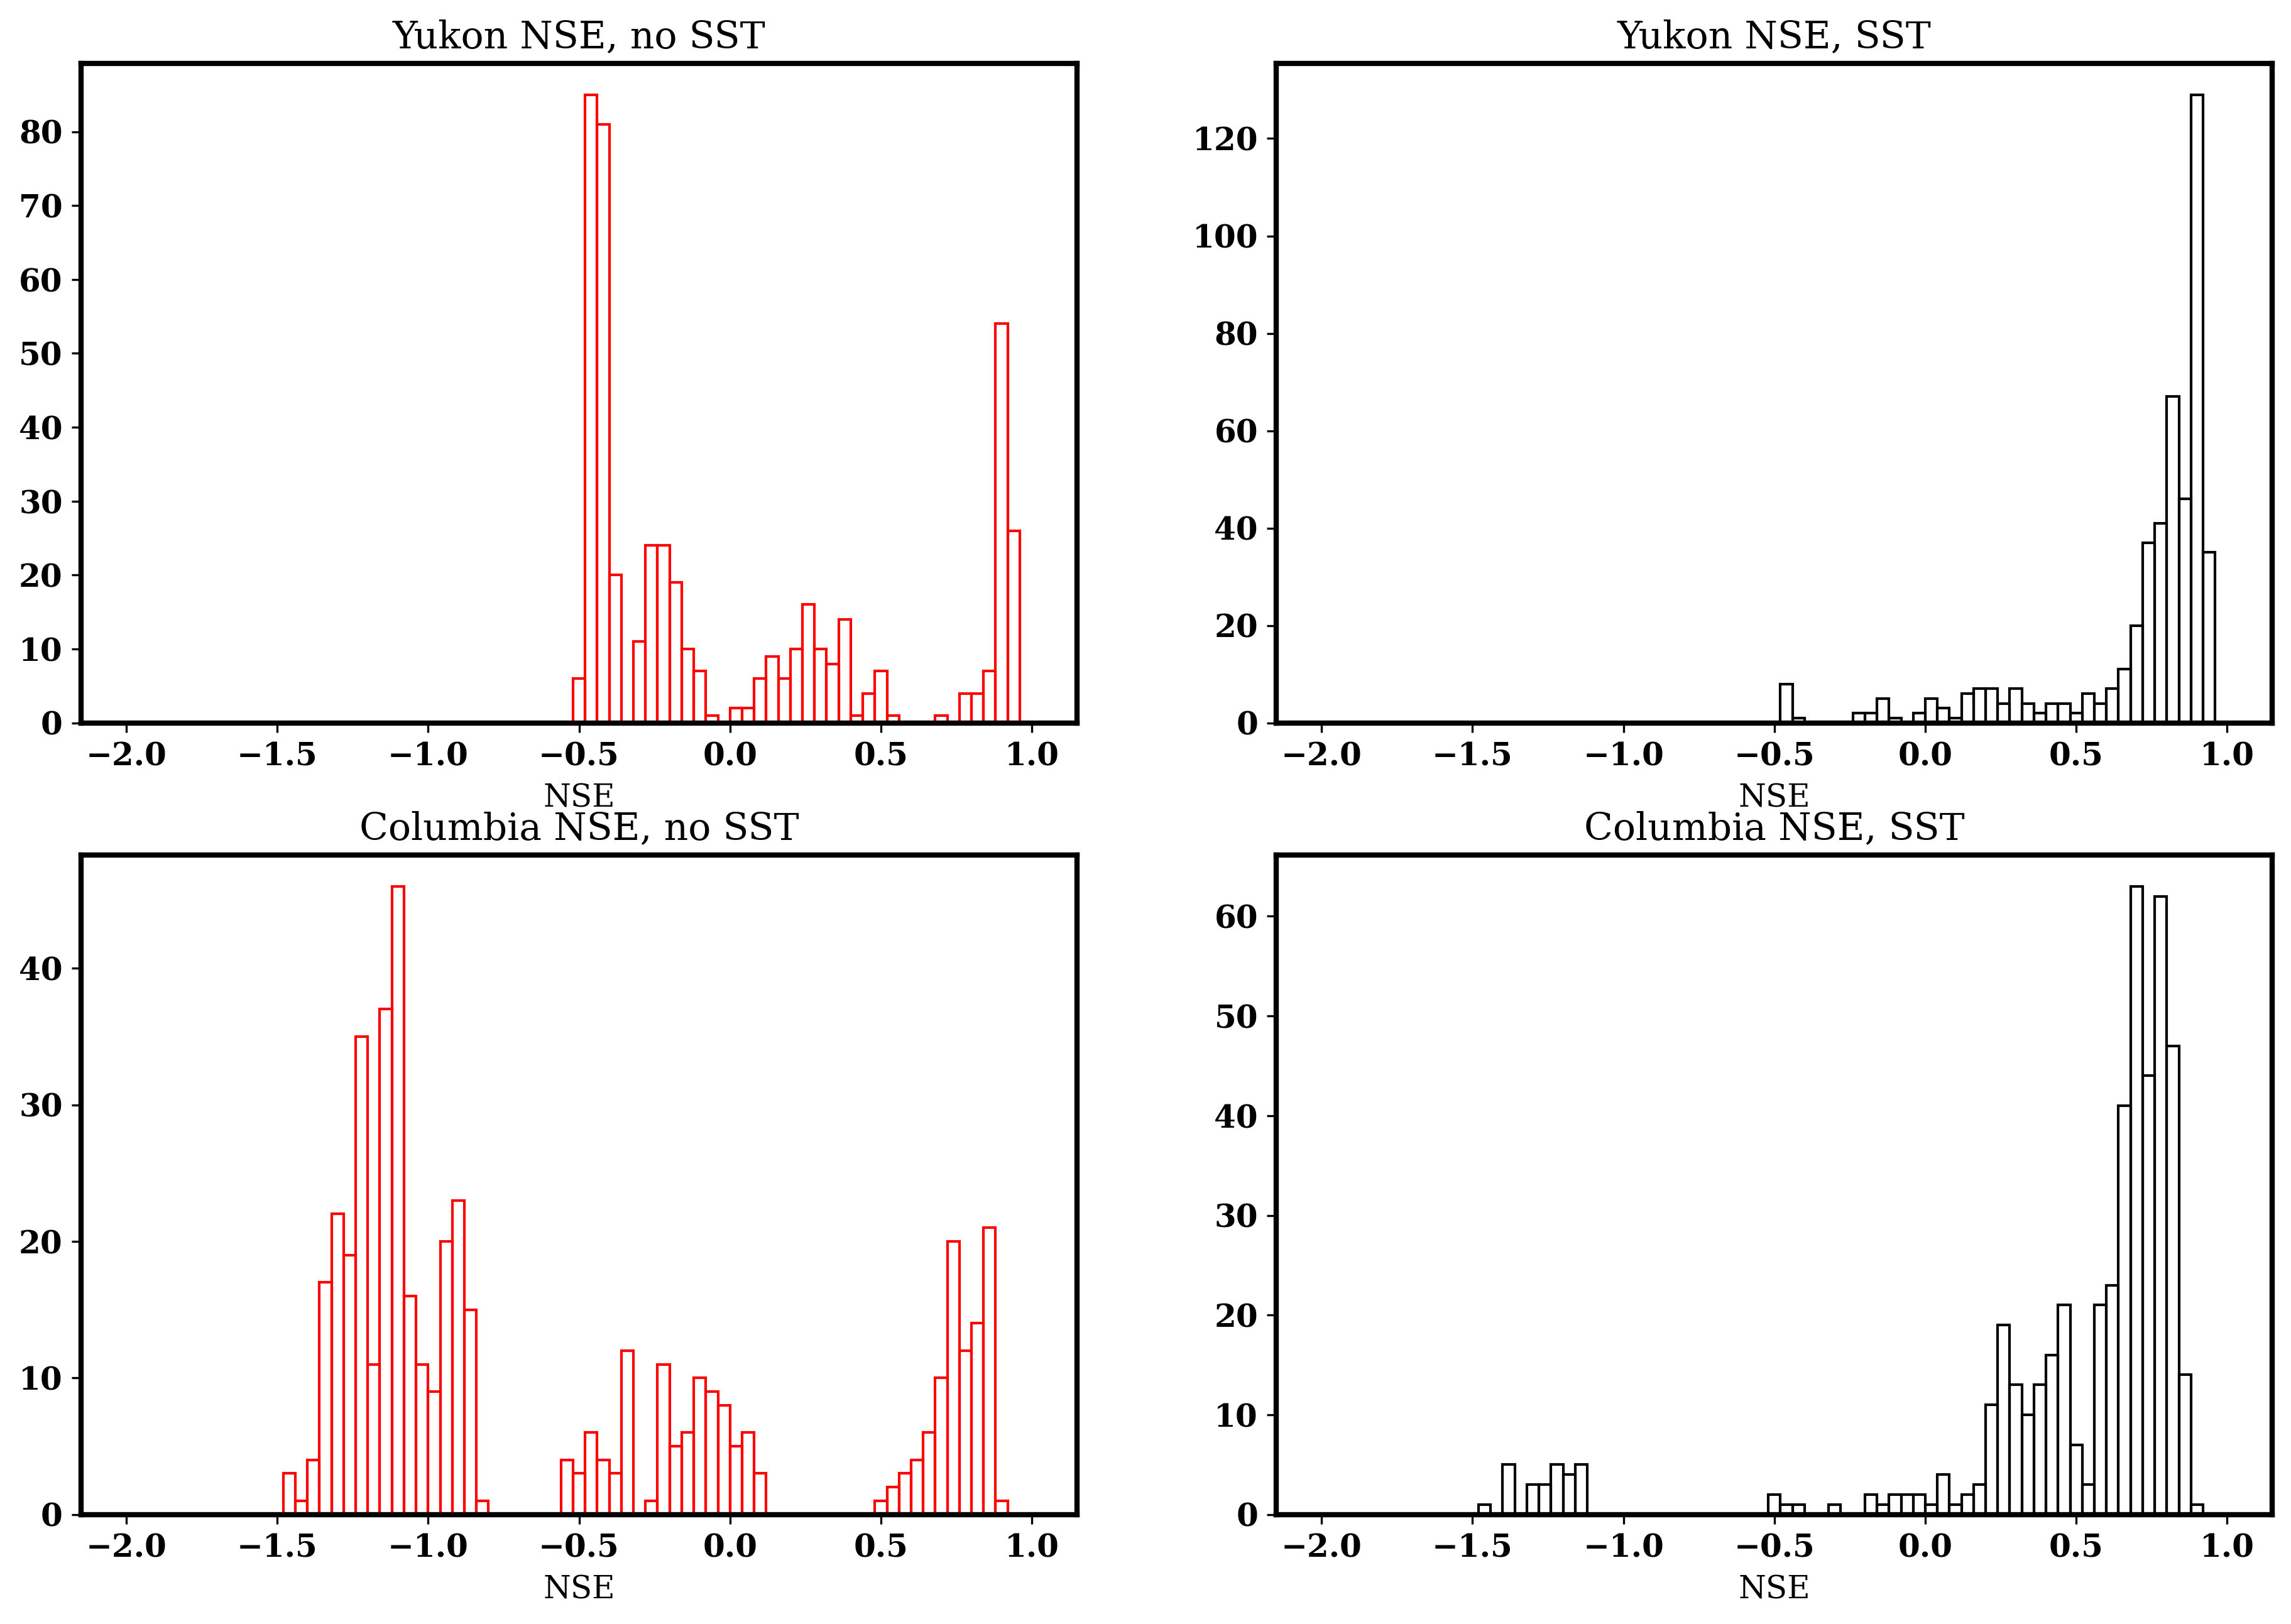

In [25]:
x = pd.read_pickle('pickles/fin-yukon.pkl')
x
x0 = pd.read_pickle('pickles/fin-columbia.pkl')
x0
fig = plt.figure(figsize=(15,10))

gs = gridspec.GridSpec(nrows=2,ncols=2)

rangee=[-2,1]
binss = 75

fig.add_subplot(gs[0])
nse_yukon_nosst = np.asarray(x[x['sst'] == 'False']['nse_test']).reshape(-1)
nse_yukon_nosst = np.float32(nse_yukon_nosst).reshape(-1)
plt.title('Yukon NSE, no SST')
plt.hist(nse_yukon_nosst,bins=binss,range=rangee,edgecolor='red',fill=False);
plt.xlabel('NSE')

fig.add_subplot(gs[1])
nse_yukon_sst = np.asarray(x[x['sst'] == 'True']['nse_test']).reshape(-1)
nse_yukon_sst = np.float32(nse_yukon_sst).reshape(-1)
plt.title('Yukon NSE, SST')
plt.hist(nse_yukon_sst,bins=binss,range=rangee,edgecolor='black',fill=False);
plt.xlabel('NSE')


fig.add_subplot(gs[2])
nse_columbia_nosst = np.asarray(x0[x0['sst'] == 'False']['nse_test']).reshape(-1)
nse_columbia_nosst = np.float32(nse_columbia_nosst).reshape(-1)
plt.title('Columbia NSE, no SST')
plt.hist(nse_columbia_nosst,bins=binss,range=rangee,fill=False,edgecolor='red');
plt.xlabel('NSE')


fig.add_subplot(gs[3])
nse_columbia_sst = np.asarray(x0[x0['sst'] == 'True']['nse_test']).reshape(-1)
nse_columbia_sst = np.float32(nse_columbia_sst).reshape(-1)
plt.title('Columbia NSE, SST')
plt.hist(nse_columbia_sst,bins=binss,range=rangee,edgecolor='black',fill=False);
plt.xlabel('NSE')

plt.savefig('./plots/sst_nosst.png')


In [ ]:
    predicts_correct_within_twosigma_of_self = []
    count_correct_within_twosigma = []
    for i in range(test_pred.shape[-1]):
        j = test_pred.cpu()[:,i]
        k = j + (2 * torch.std(j))
        l = j - (2 * torch.std(j))
        m = test_dset.tensors[-1].cpu().squeeze()[:,i]
        n = np.where((m<=k) & (m>=l),1,0)
        n1 = np.sum(n)
        o = round(100*np.sum(n)/n.shape[0],2)
        count_correct_within_twosigma.append(n1)
        predicts_correct_within_twosigma_of_self.append(o)
    avg_count = np.format_float_positional(np.mean(count_correct_within_twosigma),precision=2)
    avg_acc = np.format_float_positional(np.mean(predicts_correct_within_twosigma_of_self),precision=2)

In [ ]:
import torch
print(torch.__version__)
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

1.13.1
tensor([1.], device='mps:0')


/opt/homebrew/lib/python3.10/site-packages/torch/_tensor_str.py:115: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(
